<a href="https://colab.research.google.com/github/AFA21SCM21BO/SCM587FA21/blob/main/RNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [2]:
def importDataSet():
  
  # importing the merged dataset from spotify
  spotifyData = pd.read_csv("spotify_merged_dataset.csv")
  tempDf = spotifyData

  # converting boolean output column to int 
  tempDf["skip_2"] = tempDf["skip_2"]*1
  
  y = tempDf["skip_2"].to_numpy()
  # print(tempDf.info())
  # Dropping output column and serial number column
  tempDf = tempDf.drop(tempDf.columns[[0, 1,3,4]], axis=1)
  # print(tempDf.info())

  x = tempDf.to_numpy()
  print(y)
  return spotifyData,x,y

In [3]:
# Test train Split
from tensorflow.keras.utils import to_categorical
spotifyData,X,Y = importDataSet()
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=42)
y_train = to_categorical(y_train, 2)
y_test = to_categorical(y_test, 2)
X_train,X_test = X_train / 255.0, X_test / 255.0

[1 1 1 ... 0 0 1]


In [13]:
X_train

array([[ 7.84313725e-02, -3.91764706e+00, -3.91764706e+00,
        -3.91764706e+00, -3.91764706e+00, -3.91764706e+00],
       [ 7.84313725e-02,  1.52920230e-04,  2.01464471e-03,
        -2.25725492e-02,  1.42871413e-04,  1.02767068e-03],
       [ 3.92156863e-02, -3.91764706e+00, -3.91764706e+00,
        -3.91764706e+00, -3.91764706e+00, -3.91764706e+00],
       ...,
       [ 7.84313725e-02,  1.93474141e-03,  3.10417367e-03,
        -1.61764706e-02,  8.81899104e-04,  3.33089338e-04],
       [ 7.84313725e-02, -3.91764706e+00, -3.91764706e+00,
        -3.91764706e+00, -3.91764706e+00, -3.91764706e+00],
       [ 7.84313725e-02,  4.31883773e-04,  2.63320395e-03,
        -3.17294102e-02,  9.57136002e-04,  3.23699707e-04]])

In [4]:
X_train, X_test, y_train, y_test

(array([[ 7.84313725e-02, -3.91764706e+00, -3.91764706e+00,
         -3.91764706e+00, -3.91764706e+00, -3.91764706e+00],
        [ 7.84313725e-02,  1.52920230e-04,  2.01464471e-03,
         -2.25725492e-02,  1.42871413e-04,  1.02767068e-03],
        [ 3.92156863e-02, -3.91764706e+00, -3.91764706e+00,
         -3.91764706e+00, -3.91764706e+00, -3.91764706e+00],
        ...,
        [ 7.84313725e-02,  1.93474141e-03,  3.10417367e-03,
         -1.61764706e-02,  8.81899104e-04,  3.33089338e-04],
        [ 7.84313725e-02, -3.91764706e+00, -3.91764706e+00,
         -3.91764706e+00, -3.91764706e+00, -3.91764706e+00],
        [ 7.84313725e-02,  4.31883773e-04,  2.63320395e-03,
         -3.17294102e-02,  9.57136002e-04,  3.23699707e-04]]),
 array([[ 7.84313725e-02,  2.30265692e-03,  2.73080924e-03,
         -2.88745095e-02,  1.19587998e-04,  6.47597804e-04],
        [ 6.27450980e-02, -3.91764706e+00, -3.91764706e+00,
         -3.91764706e+00, -3.91764706e+00, -3.91764706e+00],
        [ 7.84313

In [5]:
X_train.shape,y_train.shape,X_test.shape,y_test.shape,

((33500, 6), (33500, 2), (16500, 6), (16500, 2))

In [6]:
model = keras.models.Sequential()
model.add(layers.LSTM(units=10, activation='sigmoid',input_shape = (6,1)))
model.add(layers.Dense(28, activation="sigmoid")) 
model.add(layers.Dense(8, activation="sigmoid")) 
model.add(layers.Dense(2,activation='sigmoid'))

In [7]:
loss = keras.losses.CategoricalCrossentropy(from_logits='true')
optim = keras.optimizers.Adamax(lr=0.01)
metrics = ["accuracy"]

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adamax.py:90: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adamax, self).__init__(name, **kwargs)


In [8]:
model.compile(loss=loss,optimizer=optim , metrics='accuracy')
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 10)                480       
                                                                 
 dense (Dense)               (None, 28)                308       
                                                                 
 dense_1 (Dense)             (None, 8)                 232       
                                                                 
 dense_2 (Dense)             (None, 2)                 18        
                                                                 
Total params: 1,038
Trainable params: 1,038
Non-trainable params: 0
_________________________________________________________________


In [9]:
y_train.shape

(33500, 2)

In [10]:
history=model.fit(X_train,y_train,batch_size=128,epochs=10,validation_data=(X_test,y_test),verbose=2)

Epoch 1/10


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1096: UserWarning: "`categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


262/262 - 2s - loss: 0.6942 - accuracy: 0.4993 - val_loss: 0.6932 - val_accuracy: 0.4958 - 2s/epoch - 9ms/step
Epoch 2/10
262/262 - 1s - loss: 0.6938 - accuracy: 0.5002 - val_loss: 0.6939 - val_accuracy: 0.5042 - 925ms/epoch - 4ms/step
Epoch 3/10
262/262 - 1s - loss: 0.6941 - accuracy: 0.5004 - val_loss: 0.6939 - val_accuracy: 0.4958 - 970ms/epoch - 4ms/step
Epoch 4/10
262/262 - 1s - loss: 0.6936 - accuracy: 0.5041 - val_loss: 0.6937 - val_accuracy: 0.5042 - 943ms/epoch - 4ms/step
Epoch 5/10
262/262 - 1s - loss: 0.6939 - accuracy: 0.5019 - val_loss: 0.6929 - val_accuracy: 0.5124 - 924ms/epoch - 4ms/step
Epoch 6/10
262/262 - 1s - loss: 0.6937 - accuracy: 0.4991 - val_loss: 0.6930 - val_accuracy: 0.5124 - 1s/epoch - 4ms/step
Epoch 7/10
262/262 - 1s - loss: 0.6937 - accuracy: 0.5026 - val_loss: 0.6930 - val_accuracy: 0.5042 - 973ms/epoch - 4ms/step
Epoch 8/10
262/262 - 1s - loss: 0.6934 - accuracy: 0.4998 - val_loss: 0.6932 - val_accuracy: 0.5042 - 967ms/epoch - 4ms/step
Epoch 9/10
262/26

In [11]:
pip install plot_keras_history


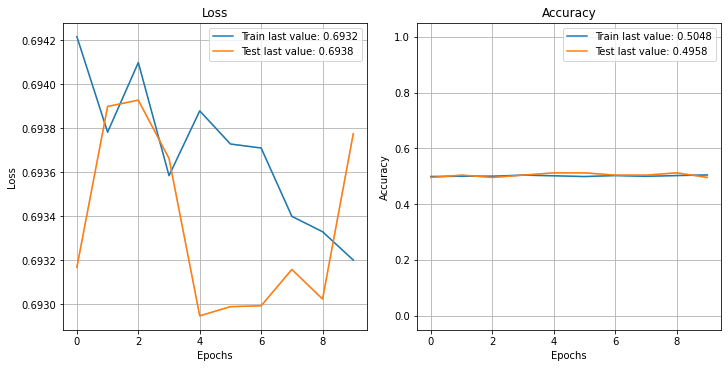

In [12]:
from plot_keras_history import show_history, plot_history
import matplotlib.pyplot as plt
show_history(history)
plot_history(history, path="standard.png")
plt.close()